In [106]:
pd.read_csv?

In [103]:
df = pd.read_csv("../../../linux/iso_time.log", header=None, names=['timestamp'])
df.head()

,timestamp
0,2017-08-15 12:49:43 -0700
1,2017-08-14 13:09:59 -0700
2,2017-08-14 11:35:56 -0700
3,2017-08-13 16:01:32 -0700
4,2017-08-13 15:34:28 -0700


In [139]:
t = pd.to_datetime(df[:5]['timestamp'], utc=True)
tz = t[0]
tz.tz

In [148]:
d = pd.DataFrame(['2017-08-15 12:49:43 -0700'], columns=["t"])
pd.to_datetime(d['t'])

0   2017-08-15 19:49:43
Name: t, dtype: datetime64[ns]

In [13]:
import pandas as pd

git_log = pd.read_csv(
    "../../../linux/git_log_basic.bz2",
    sep="#",
    header=None,
    names=['timestamp', 'author', 'email']
)
git_log.head()

,timestamp,author,email
0,1502826583,Linus Torvalds,torvalds@linux-foundation.org
1,1502741399,Linus Torvalds,torvalds@linux-foundation.org
2,1502735756,Linus Torvalds,torvalds@linux-foundation.org
3,1502665292,Linus Torvalds,torvalds@linux-foundation.org
4,1502663668,Linus Torvalds,torvalds@linux-foundation.org


In [9]:
import pandas as pd

parse_timestamp_in_s = lambda x : pd.to_datetime(x, unit="s")

git_log = pd.read_csv(
    "../../../linux/git_log_basic.bz2",
    encoding="utf-8",
    sep="#",
    header=None,
    names=['timestamp', 'author', 'email'],
    parse_dates=[0],
    date_parser= parse_timestamp_in_s,
    index_col=0,
    compression="bz2"
)
git_log.head()

,author,email
timestamp,,
2017-08-15 19:49:43,Linus Torvalds,torvalds@linux-foundation.org
2017-08-14 20:09:59,Linus Torvalds,torvalds@linux-foundation.org
2017-08-14 18:35:56,Linus Torvalds,torvalds@linux-foundation.org
2017-08-13 23:01:32,Linus Torvalds,torvalds@linux-foundation.org
2017-08-13 22:34:28,Linus Torvalds,torvalds@linux-foundation.org


In [10]:
git_log['author'].sort_values()

timestamp
2017-01-26 21:29:48    =?UTF-8?q?Simon=20Sandstr=C3=B6m?=
2005-06-20 12:22:55                                     ?
2010-08-29 20:51:52                          A E Lawrence
2014-08-07 08:40:39                     A Raghavendra Rao
2014-06-11 04:58:58                     A Raghavendra Rao
2017-03-26 18:28:08                                 A Sun
2017-04-13 08:06:47                                 A Sun
2017-03-26 19:04:51                                 A Sun
2017-03-26 18:33:07                                 A Sun
2006-03-14 23:44:23                   A. Maitland Bottoms
2015-04-16 08:52:09                        A.Sunil Kamath
2014-11-24 08:07:44                        A.Sunil Kamath
2016-11-20 17:50:26                        A.Sunil Kamath
2015-04-16 08:52:12                        A.Sunil Kamath
2005-11-15 07:55:18                           A.YOSHIYAMA
2009-02-12 23:14:18                        ADDI-DATA GmbH
2014-07-04 07:28:31                       AKASHI Takahiro
2014

Note: We are using the UNIX timestamp here because it's superfast to convert it to a real `datatime64` data type.

# Cleaning up wrong timestamps

_Note: `'today'`is suboptimal

In [234]:
first_commit = git_log.index[-1]
first_commit

Timestamp('2005-04-16 22:20:36')

In [11]:
today = pd.to_datetime('today')
type(today)

pandas._libs.tslib.Timestamp

#Soluition

In [237]:
git_log[(git_log < today) & (git_log >= first_commit)]

,author,email
timestamp,,
2017-08-29 18:16:21,Linus Torvalds,torvalds@linux-foundation.org
2017-08-29 18:13:52,Linus Torvalds,torvalds@linux-foundation.org
2017-08-29 16:11:06,Linus Torvalds,torvalds@linux-foundation.org
2017-08-29 15:36:58,Tejun Heo,tj@kernel.org
2017-08-29 12:42:06,Christoph Hellwig,hch@lst.de
2017-08-28 23:45:40,Linus Torvalds,torvalds@linux-foundation.org
2017-08-28 21:51:27,Tejun Heo,tj@kernel.org
2017-08-28 22:03:58,Alexey Brodkin,abrodkin@synopsys.com
2017-08-23 20:37:00,Helge Deller,deller@gmx.de


In [222]:
corrected_dates = git_log.iloc[
    -2
]
# & (git_log.index <= 'today')
corrected_dates

author        Christoph Lameter
email     clameter@engr.sgi.com
Name: 2005-04-16 22:23:53, dtype: object

In [226]:
corrected_dates = git_log.iloc[:, -1]
# & (git_log.index <= 'today')
corrected_dates

timestamp
2017-08-29 18:16:21    torvalds@linux-foundation.org
2017-08-29 18:13:52    torvalds@linux-foundation.org
2017-08-29 16:11:06    torvalds@linux-foundation.org
2017-08-29 15:36:58                    tj@kernel.org
2017-08-29 12:42:06                       hch@lst.de
2017-08-28 23:45:40    torvalds@linux-foundation.org
2017-08-28 21:51:27                    tj@kernel.org
2017-08-28 22:03:58            abrodkin@synopsys.com
2017-08-23 20:37:00                    deller@gmx.de
2017-08-28 18:15:46    torvalds@linux-foundation.org
2017-08-28 06:28:08                       hch@lst.de
2017-08-28 00:20:40    torvalds@linux-foundation.org
2017-08-28 00:10:34    torvalds@linux-foundation.org
2017-08-28 00:08:37    torvalds@linux-foundation.org
2017-08-28 00:03:33    torvalds@linux-foundation.org
2017-08-28 00:01:54    torvalds@linux-foundation.org
2017-08-27 23:25:09    torvalds@linux-foundation.org
2017-08-27 20:55:12    torvalds@linux-foundation.org
2017-08-27 19:12:25    torvalds@linu

In [209]:
%matplotlib inline
corrected_dates = git_log.loc[
    str(git_log.index[-1]) : '2017-1-1'
]
# & (git_log.index <= 'today')
corrected_dates

,author,email
timestamp,,
2016-08-05 09:55:18,Philipp Zabel,p.zabel@pengutronix.de
2014-03-19 17:41:37,Arnd Bergmann,arnd@arndb.de
2016-06-10 08:51:04,Arnd Bergmann,arnd@arndb.de
2014-03-25 23:17:09,Arnd Bergmann,arnd@arndb.de
2016-01-15 12:04:01,Arnd Bergmann,arnd@arndb.de
2016-01-14 15:57:33,Arnd Bergmann,arnd@arndb.de
2015-12-29 16:09:18,Arnd Bergmann,arnd@arndb.de
2015-12-29 13:40:00,Arnd Bergmann,arnd@arndb.de
2016-01-15 12:32:43,Arnd Bergmann,arnd@arndb.de


,timestamp,author,email
timestamp,,,
2005-04-30,792,792,792
2005-05-31,1319,1319,1319
2005-06-30,2123,2123,2122
2005-07-31,1538,1537,1537
2005-08-31,1521,1521,1520


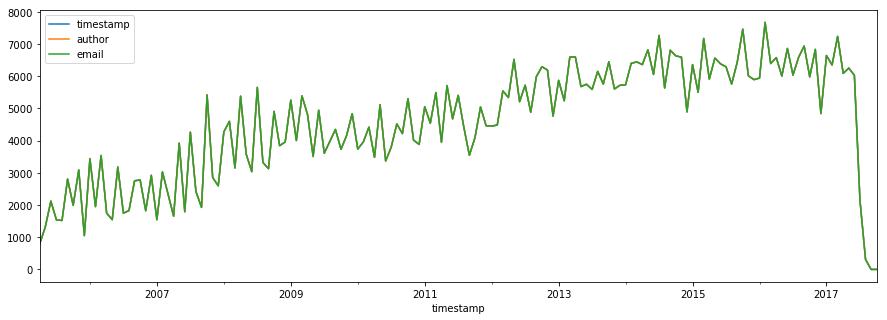

In [53]:
grouped_by_time = corrected_dates.groupby(pd.TimeGrouper(freq="M")).count()
grouped_by_time.plot(figsize=(15,5))
grouped_by_time.head()

Bonus: get rid of the incomplete months at the beginning or end (but does it make sens at all to remove them?)

One author didn't provide his/her name, so it's null. What to do about it? Remove it or set it to unknown?

In [54]:
git_log['author'] = git_log['author'].fillna("UNKNOWN")
git_log.head()

,timestamp,author,email
timestamp,,,
2017-08-15 19:49:43,2017-08-15 19:49:43,Linus Torvalds,torvalds@linux-foundation.org
2017-08-14 20:09:59,2017-08-14 20:09:59,Linus Torvalds,torvalds@linux-foundation.org
2017-08-14 18:35:56,2017-08-14 18:35:56,Linus Torvalds,torvalds@linux-foundation.org
2017-08-13 23:01:32,2017-08-13 23:01:32,Linus Torvalds,torvalds@linux-foundation.org
2017-08-13 22:34:28,2017-08-13 22:34:28,Linus Torvalds,torvalds@linux-foundation.org


In [56]:
git_log['author'].value_counts().head()

Linus Torvalds     23361
David S. Miller     8994
Mark Brown          6796
Takashi Iwai        6206
Al Viro             5993
Name: author, dtype: int64

In [69]:
git_log[git_log['author'].str.contains('Viro')]

,timestamp,author,email
timestamp,,,
2017-07-12 03:59:45,2017-07-12 03:59:45,Al Viro,viro@ZenIV.linux.org.uk
2017-07-10 11:40:49,2017-07-10 11:40:49,Al Viro,viro@zeniv.linux.org.uk
2017-04-20 20:43:12,2017-04-20 20:43:12,Al Viro,viro@zeniv.linux.org.uk
2017-07-08 15:26:39,2017-07-08 15:26:39,Al Viro,viro@zeniv.linux.org.uk
2017-07-07 18:51:19,2017-07-07 18:51:19,Al Viro,viro@zeniv.linux.org.uk
2017-06-30 02:25:14,2017-06-30 02:25:14,Al Viro,viro@zeniv.linux.org.uk
2017-07-06 13:15:47,2017-07-06 13:15:47,Al Viro,viro@zeniv.linux.org.uk
2017-07-06 06:00:00,2017-07-06 06:00:00,Al Viro,viro@zeniv.linux.org.uk
2017-05-25 20:28:49,2017-05-25 20:28:49,Al Viro,viro@zeniv.linux.org.uk


# Multiple authors, but same person
Examine the TOP 5 contributors of the repository. Which person(s) used multiple author names?
(0) Linus Torvalds
(1) David S. Millter
(1) Mark Brown
(1)
(2) Al Viro 

Hint: One author name is a little bit tricky. We'll asume, that both author names are the same person.


(Hint: Count the commits per author